In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

In [2]:


labels = ["time slice number", "ro mean [bin]", "ro variance", "tx mean [bin]", "tx variance"];
datatypes = [int, float, float, float, float]
for s in range(0, 9):
    labels.append("axial offset [ring], segment number " + str(s))
    labels.append("axial offset variance, segment number " + str(s))
    datatypes.append(float)
    datatypes.append(float)

labels.append("mean tof offset")
datatypes.append(float)
labels.append("mean ring difference")
datatypes.append(float)
    
print (len(labels))

print (datatypes)
print( datatypes[1] ("34.6"))

csvFolder = r"C:\Users\petct\Desktop\Hugo\Code\KEX_LM\csv"

25
[<class 'int'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>, <class 'float'>]
34.6


In [3]:
#Cylinder, 60 000 ms per timeslice 
f1 = r"\CylinderPET-LM-00-COM60.txt"
f2 =  r"\CylinderPET-LM-01-COM60.txt"

In [221]:
#Kanyl, 6000 ms per timeslice
f1 = r"\KanylPET-LM-00-COM60.txt"
f2 = r"\KanylPET-LM-01-COM60.txt"

In [242]:
#Cylinder, 1 ms per timeslice 
f1 = r"\CylinderPET-LM-00-COM1m.txt"
f2 = r"\CylinderPET-LM-01-COM1m.txt"

In [240]:
#Kanyl, 2000 ms per timeslice
f1 = r"\KanylPET-LM-00-COM2.txt"
f2 =  r"\KanylPET-LM-01-COM2.txt"

In [238]:
#Kanyl, 100 ms (1 "decisekund" ) per timeslice
f1 = r"\KanylPET-LM-00-COM1d.txt"
f2 = r"\KanylPET-LM-01-COM1d.txt"

In [234]:
#Kanyl, 100 ms (1 "decisekund" ) per timeslice
f1 = r"\KanylPET-LM-00-COM1m.txt"
f2 = r"\KanylPET-LM-01-COM1m.txt"

In [5]:
files = [r"\CylinderPET-LM-00-COM60.txt", 
         r"\CylinderPET-LM-01-COM60.txt", 
         r"\KanylPET-LM-00-COM60.txt", 
         r"\KanylPET-LM-01-COM60.txt"]

In [19]:
#read information from files
headers = []
CenterOfMass = []

for fl in files:
    path = csvFolder + fl
    with open(path, 'r') as csvfile:
        rows= csv.reader(csvfile, delimiter=',')
        headers.append(next(rows))
        for r in rows:
            for k in range(0, len(r)):
                r[k] = float(r[k])
            CenterOfMass.append(r)

print(headers[0])
print(CenterOfMass)

['radial offset', ' transaxial angle', ' axial offset', ' ring difference', ' tof offset']
[[-0.242707, 83.5435, 54.3389, 0.0239436, -0.0792801], [12.4738, 83.5383, 54.3311, 0.0249086, -0.0789674], [24.9822, 83.472, 48.6354, 0.108814, -0.149706], [48.1372, 83.346, 49.0079, 0.0729533, -0.15515]]


In [55]:
#COM coordinates to pixel coordinates  

for counter,value in enumerate(CenterOfMass):
    radial_offset = value[0]
    transaxial_angle = value[1]
    axial_offset = value[2]
    ring_difference = value[3]
    tof_offset = value[4]

    #calculate direction vector and the midway point between rings
    #convert data angles to radians
    halfturn_anglebins= 168
    rad_angle = np.pi*transaxial_angle / halfturn_anglebins
    ring_radius_mm = 427.4
    pixel_mm = 2.005
    r_offset_mm = radial_offset*pixel_mm
    a_offset_mm = axial_offset*pixel_mm
    #axially, each ring is 2 pixels high (1 and 1 between rings)
    r_difference_mm = ring_difference*pixel_mm*2
    halfway = np.array([r_offset_mm*np.cos(rad_angle), 
                        r_offset_mm*np.sin(rad_angle), 
                        a_offset_mm])
    
    perpendicular = rad_angle - np.pi/2;
    half_LOR_length = np.sqrt(ring_radius_mm**2-r_offset_mm**2)
    
    translation = np.array([half_LOR_length*np.cos(perpendicular), 
                            half_LOR_length*np.sin(perpendicular), 
                            r_difference_mm/2])
    detectors = [halfway + translation, halfway-translation]
    translation_normalized = translation / np.sqrt(np.sum(np.power(translation, 2.0)))
    print("normalized translation", translation_normalized)
    
    time_tofbin_s=312*1e-12
    speed_of_light=3*1e8
    tofbin_length_mm=speed_of_light*time_tofbin_s*1e3
    print("tofbin length mm", tofbin_length_mm)
    t = tof_offset*tofbin_length_mm
    pixel = halfway
    pixel += t*translation_normalized 
    pixel = pixel /pixel_mm
    pixel = pixel + [100, 100, 0]
    np.flip(pixel)
    print(files[counter])
    print("pixel", np.array(pixel, dtype=int), "\n")
    






normalized translation [ 9.99963558e-01 -8.53642630e-03  1.12323231e-04]
tofbin length mm 93.60000000000001
\CylinderPET-LM-00-COM60.txt
pixel [96 99 54] 

normalized translation [ 9.99962722e-01 -8.63366249e-03  1.17050697e-04]
tofbin length mm 93.60000000000001
\CylinderPET-LM-01-COM60.txt
pixel [ 96 112  54] 

normalized translation [ 9.99951125e-01 -9.87341518e-03  5.14005438e-04]
tofbin length mm 93.60000000000001
\KanylPET-LM-00-COM60.txt
pixel [ 93 125  48] 

normalized translation [ 9.99925156e-01 -1.22294658e-02  3.51309874e-04]
tofbin length mm 93.60000000000001
\KanylPET-LM-01-COM60.txt
pixel [ 93 148  49] 



In [17]:
print(np.pi*2)

6.283185307179586


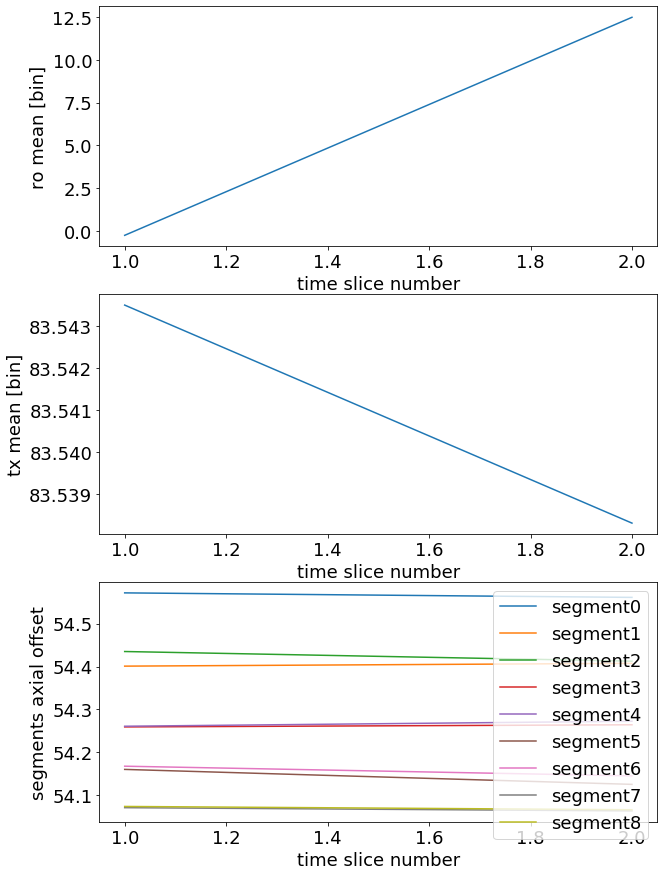

data from \CylinderPET-LM-00-COM60.txt and \CylinderPET-LM-01-COM60.txt


In [9]:
path1 = csvFolder + f1
path2 = csvFolder + f2

#clear and load
data=[]
for k in range(0, len(labels)):
    data.append([])
    
    
with open(path1, 'r') as csvfile:
    plots= csv.reader(csvfile, delimiter=',')
    for row in plots:
        for dim in range(0, len(row)):
            data[dim].append(datatypes[dim](row[dim]))
        #x.append(int(row[0]))
        #y.append(float(row[1]))

shift = data[0][-1]
#print(shift)
with open(path2, 'r') as csvfile:
    plots= csv.reader(csvfile, delimiter=',')
    for row in plots:
        data[0].append(datatypes[0](row[0]) + shift)
        for dim in range(1, len(row)):
            data[dim].append(datatypes[dim](row[dim]))
            
            
#plot
dims = 3
step=2
plt.figure(figsize=(10,15))
plt.title('Data from ' + f1 )
for d in range(0,dims-1):
    plt.subplot(dims, 1, d+1)
    plt.plot(data[0], data[d*step+1])
    plt.xlabel(labels[0])
    plt.ylabel(labels[d*step+1])
    
segments=9
ax = plt.subplot(dims, 1, dims)
plt.xlabel(labels[0])
plt.ylabel("segments axial offset")
legs = []

for s in range(0, segments):
    plt.plot(data[0], data[1+(dims-1+s)*step])
    legs.append("segment" + str(s))

ax.legend(legs, loc='upper right')   







plt.show()
#print(data[dim1])
#print(labels[2:3:7])
print("data from " +f1 + " and " + f2)

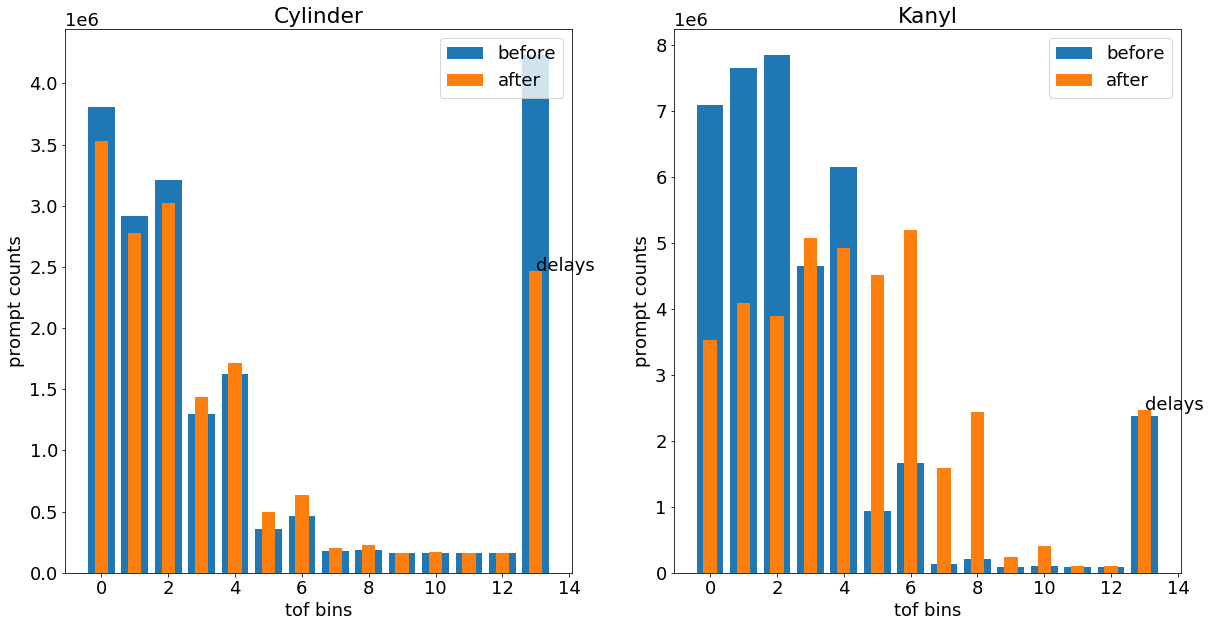

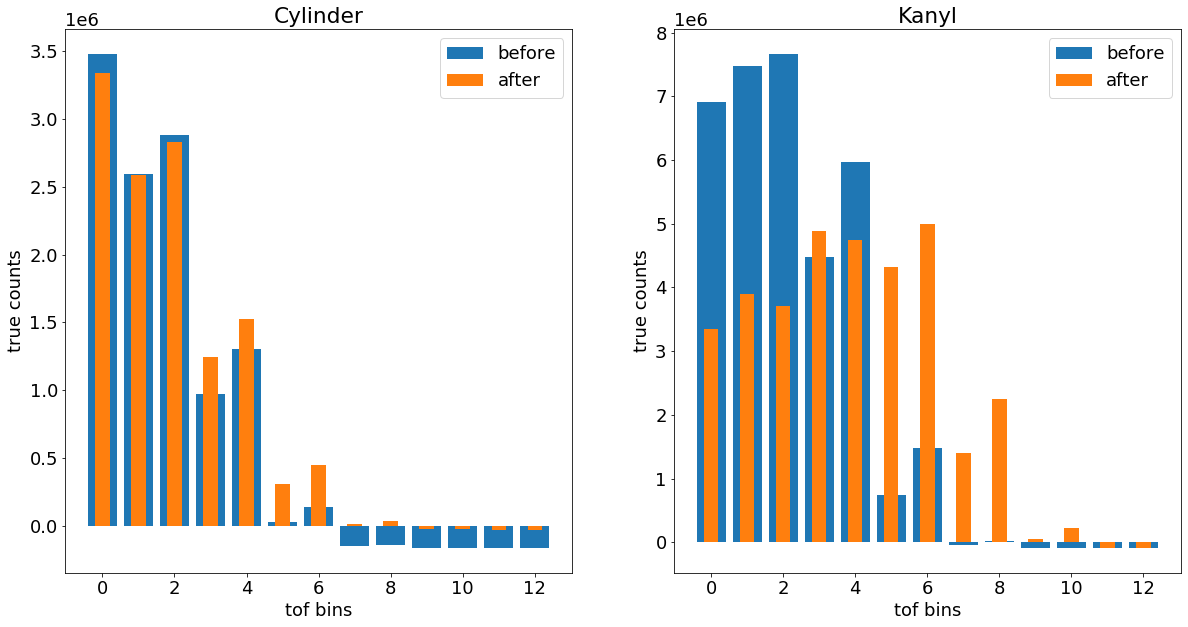

In [97]:
#plot histogram for tof bins 
location = r"C:\Users\petct\Desktop\Hugo\Code\KEX_LM\tofbinhisto\tofbinhisto"
phantoms = ["Cylinder", "Kanyl"]
tails = ["00", "01"]
meaning = ["before", "after"]
fform = ".txt"     
barwidth = [0.8, 0.4]

plt.figure(figsize=(20,10))
for i in range(0,len(phantoms)):
    ax = plt.subplot(1,2,i+1)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))    
    legs = []
    for j in range(0, len(tails)):
        path = location + phantoms[i] + tails[j] + fform
        tofbin = []
        counts = []
        with open(path, 'r') as csvfile:
            plots= csv.reader(csvfile, delimiter=',')
            for row in plots:
                tofbin.append(int(row[0]))
                counts.append(int(row[1]))
            #print(sum(counts))
        plt.bar(tofbin, counts, width=barwidth[j])
    plt.text(tofbin[-1], counts[-1], 'delays')
    ax.legend(meaning, loc='upper right')  
    
    plt.title(phantoms[i])
    plt.xlabel("tof bins")
    plt.ylabel("prompt counts")

#plot bar histogram with trues

plt.figure(figsize=(20,10))
for i in range(0,len(phantoms)):
    fig, ax = plt.subplot(1,2,i+1)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))    
    legs = []
    for j in range(0, len(tails)):
        path = location + phantoms[i] + tails[j] + fform
        data = [[],[]]
        with open(path, 'r') as csvfile:
            plots= csv.reader(csvfile, delimiter=',')
            for row in plots:
                data[0].append(int(row[0]))
                data[1].append(int(row[1]))
            delays = data[1][-1];
            delaysperbin = delays/(len(data[1])-1)
            for k in range(0, len(data[1])):
                data[1][k] -= delaysperbin
        lowerbound=0
        plt.bar(data[0][lowerbound:-1], data[1][lowerbound:-1], width=barwidth[j])
    ax.legend(meaning, loc='upper right')  
    
    plt.title(phantoms[i])
    plt.xlabel("tof bins")
    plt.ylabel("true counts")
    

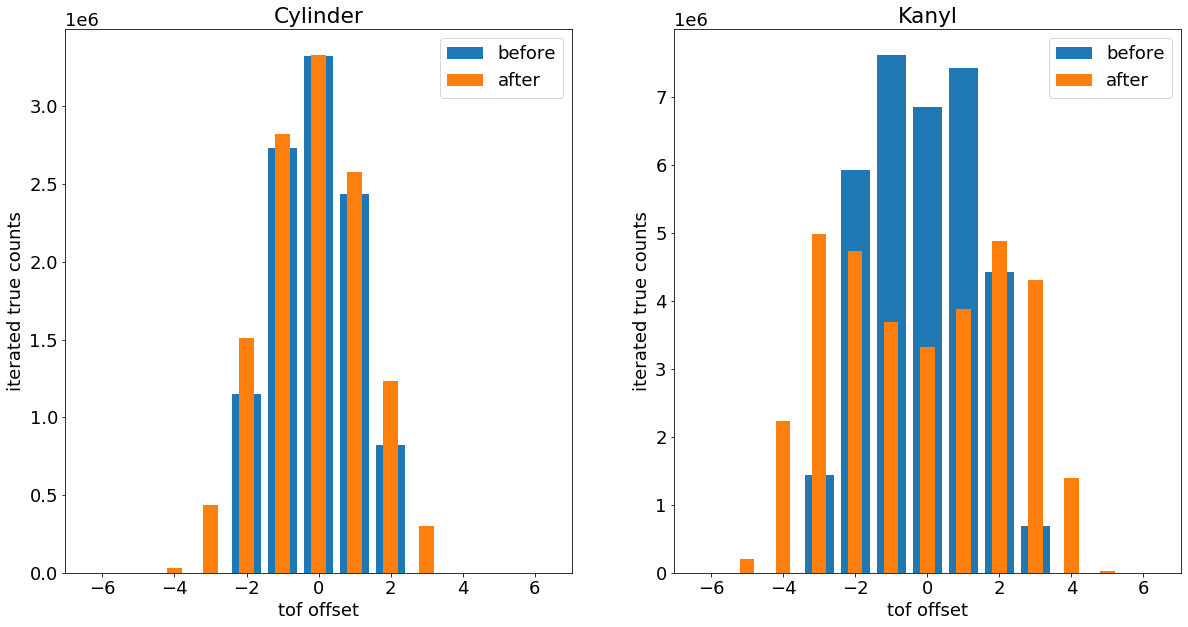

In [98]:
#plot histogram for tof bins 
location = r"C:\Users\petct\Desktop\Hugo\Code\KEX_LM\tofbinhisto\tofbinhisto"
phantoms = ["Cylinder", "Kanyl"]
tails = ["00", "01"]
meaning = ["before", "after"]
fform = ".txt"     
barwidth = [0.8, 0.4]

#plot toff offset
offsets = np.array([0, 1,-1,2,-2,3,-3,4,-4, 5,-5,6,-6]) 
#print("len ", len(offsets))
data = np.array([offsets, np.zeros((len(offsets),))])
#print("data shape ", data.shape)
#print(len(data[0]))
#print(data[0,0])

plt.figure(figsize=(20,10))
for i in range(0,len(phantoms)):
    ax = plt.subplot(1,2,i+1)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))    
    legs = []
    for j in range(0, len(tails)):
        path = location + phantoms[i] + tails[j] + fform
        #print("--------------------------------------")
        with open(path, 'r') as csvfile:
            plots= csv.reader(csvfile, delimiter=',')
            delays = 0
            for k,row in enumerate(plots):
                #print("data[1,",k,"]=")
                #print(data[1,k])
                if (k < len(data[1])):
                    data[1,k]=float(row[1])
                else:
                    #print("delay counts at row",k)
                    delays = float(row[1])
            #print("counts: ", data[1])
            for k in range(0,len(data[1])):
                if(delays > 0):
                    positive = data[1] > 0
                    #print("delays ", delays)
                    #print("histogram is positive", positive)
                    positiveCount = sum(positive)
                    #print("positive bins", positiveCount)
                    delaysperbin = delays/(sum(positive))
                    data[1][positive] -= delaysperbin
                    negative = data[1] < 0
                    #print("subtracting delays")
                    #print("counts: ", data[1])
                    #print("negative bins", sum(negative))
                    #print("collecting negative counts")
                    delays = -sum(data[1][negative])
                    data[1][negative]=0
                    #print("counts: ", data[1])
                    positive = data[1] > 0
        lowerbound=0
        plt.bar(data[0], data[1], width=barwidth[j])
    ax.legend(meaning, loc='upper right')  
    
    plt.title(phantoms[i])
    plt.xlabel("tof offset")
    plt.ylabel("iterated true counts")

In [297]:
segs = [109, 97, 97, 75, 75, 53, 53, 31, 31]
print(sum(segs))

621
